# SARANDEEP SABUT
#  ROLL- 20051397
#  HRC_UID- H2H10733K

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Milestone 1 - Data Sanity ( by using Numpy and Pandas)

### 1.Use the PRS dataset to create a dataframe

In [2]:
df=pd.read_csv('C:/Users/KIIT/Desktop/High Radius/Final.csv')   #Read the CSV file located at 'C:/Users/KIIT/Desktop/High Radius/Final.csv' and store it in the 'df' variable
df.head()                                                       ## Display the first few rows of the DataFrame 'df'

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


### 2.Check the description of the dataframe

In [3]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


### 3.Check the shape of the dataframe

In [4]:
df.shape    # Retrieve the shape of the DataFrame 'df'

(1101925, 16)

### 4.Check the data frame informations

In [5]:
df.info()    # Display information about the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

### 5.Check for the Null values in the dataframe

In [6]:
df.isnull()   # Check for missing values in the DataFrame 'df'

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101921,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101922,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1101923,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


### 6.Replace all the null values with "NaN"

In [7]:
df=df.fillna('NaN')   # Fill missing values with 'NaN' in the DataFrame 'df'
df                    # Print the updated DataFrame 'df'

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,20220601,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,20220601,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,20220601,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,20220601,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


### 7.Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"

In [8]:
# Convert the 'ORDER_CREATION_DATE' column to datetime format
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format='%Y%m%d')  

In [9]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",20220601,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",20220601,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",20220601,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",20220601,SGD,NaN,1210331811


### 8.Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [10]:
# Convert the 'REQUESTED_DELIVERY_DATE' column to datetime format
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')

In [11]:
df.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64         
 1   SALES_ORG                1101925 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object        
 3   DIVISION                 1101925 non-null  object        
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object        
 5   PURCHASE_ORDER_TYPE      1101925 non-null  object        
 6   COMPANY_CODE             1101925 non-null  int64         
 7   ORDER_CREATION_DATE      1101925 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1101925 non-null  int64         
 9   CREDIT_CONTROL_AREA      1101925 non-null  object        
 10  SOLD_TO_PARTY            1101925 non-null  int64         
 11  ORDER_AMOUNT             1101925 non-null  object        
 12  

### 9.Sanity check - Check how many records are having order date greater than the delivery date

In [12]:
len(df[df['ORDER_CREATION_DATE']>df['REQUESTED_DELIVERY_DATE']])   # Count the number of rows where ORDER_CREATION_DATE is greater than REQUESTED_DELIVERY_DATE

27142

### 10.Remove those records where order date is greater than the delivery date 

In [13]:
df.drop(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].index, inplace=True)  # Drop rows where ORDER_CREATION_DATE is greater than REQUESTED_DELIVERY_DATE
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


### 11.Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.

In [14]:
count = df['ORDER_AMOUNT'].str.contains('-').sum()  # Count the number of occurrences where 'ORDER_AMOUNT' contains '-'
print(count)

32


### 12.Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [15]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace("-", "")  # Remove the '-' character from values in the 'ORDER_AMOUNT' column

In [16]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,"954,61",2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,"787,36",2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,"67493,46",2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,"1405,54",2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,"0,00",2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,"4415,19",2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,"0,00",2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,"0,00",2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,"0,00",2022-06-01,SGD,NaN,1210331811


### 13.Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..

In [17]:
count = df['ORDER_AMOUNT'].str.contains(',').sum()  # Count the number of values in the 'ORDER_AMOUNT' column that contain a comma (',')
print(count)

1073406


### 14.Replace “,” with “.” from the “ORDER_AMOUNT” field.

In [18]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')  # Replace commas (',') with dots ('.') in the 'ORDER_AMOUNT' column

In [19]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811


### 15.Count the number of records where the order date and the delivery date are same

In [20]:
count=len(df[df['ORDER_CREATION_DATE']==df['REQUESTED_DELIVERY_DATE']])   # Count the number of rows where ORDER_CREATION_DATE is equal to REQUESTED_DELIVERY_DATE
print(count)

100437


### Extra: Correcting the error HU1 to HUF

In [21]:
df['ORDER_CURRENCY']=df['ORDER_CURRENCY'].str.replace('1','F')  # Replace '1' with 'F' in the 'ORDER_CURRENCY' column
print(df['ORDER_CURRENCY'].value_counts())

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HUF      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


### 16.Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [22]:
df['ORDER_CURRENCY'].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HUF      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

### 17.Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column. 

In [23]:
# Define exchange rates as a dictionary
exchange_rates = {
    'USD': 1.00,
    'EUR': 1.05,
    'AUD': 0.74,
    'CAD': 0.79,
    'GBP': 0.77,
    'MYR': 0.24,
    'PLN': 0.31,
    'AED': 0.27,
    'HKD': 0.79,
    'CHF': 0.97,
    'RON': 0.23,
    'SGD': 0.77,
    'CZK': 0.04,
    'HUF': 0.004,
    'NZD': 0.67,
    'BHD': 2.70,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.32,
    'SEK': 0.09
}

# Convert the exchange_rates dictionary to a Series
exchange_rates_series = pd.Series(exchange_rates)

# Convert 'ORDER_AMOUNT' column to numeric data type, coerce invalid values to NaN
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')

# Function to convert 'ORDER_AMOUNT' to USD based on 'ORDER_CURRENCY'
def convert_to_usd(row):
    if row['ORDER_CURRENCY'] == 'USD':
        return row['ORDER_AMOUNT']
    elif row['ORDER_CURRENCY'] in exchange_rates:
        return row['ORDER_AMOUNT'] * exchange_rates[row['ORDER_CURRENCY']]

# Apply the conversion function to create a new 'amount_in_usd' column
df['amount_in_usd'] = df.apply(convert_to_usd, axis=1)
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1002.3405
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,826.7280
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,70868.1330
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1475.8170
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3399.6963
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000


### 18.Check for values “0” in the “'amount_in_usd” column.

In [24]:
len(df[df['amount_in_usd'] == 0])  #calculates the length (number of rows) of the subset of the DataFrame df where the 'amount_in_usd' column is equal to 0.

237821

### 19.Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'

In [25]:
df['unique_cust_id']=df['CUSTOMER_NUMBER']+df['COMPANY_CODE']
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1002.3405,12315027
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,826.7280,12315027
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,70868.1330,12122018
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1475.8170,1210503060
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,1210354690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3399.6963,1210336064
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,1210336064
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,1210336071
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,1210336071


# Milestone 2 - EDA

### 1.Create a Histogram on DISTRIBUTION_CHANNEL

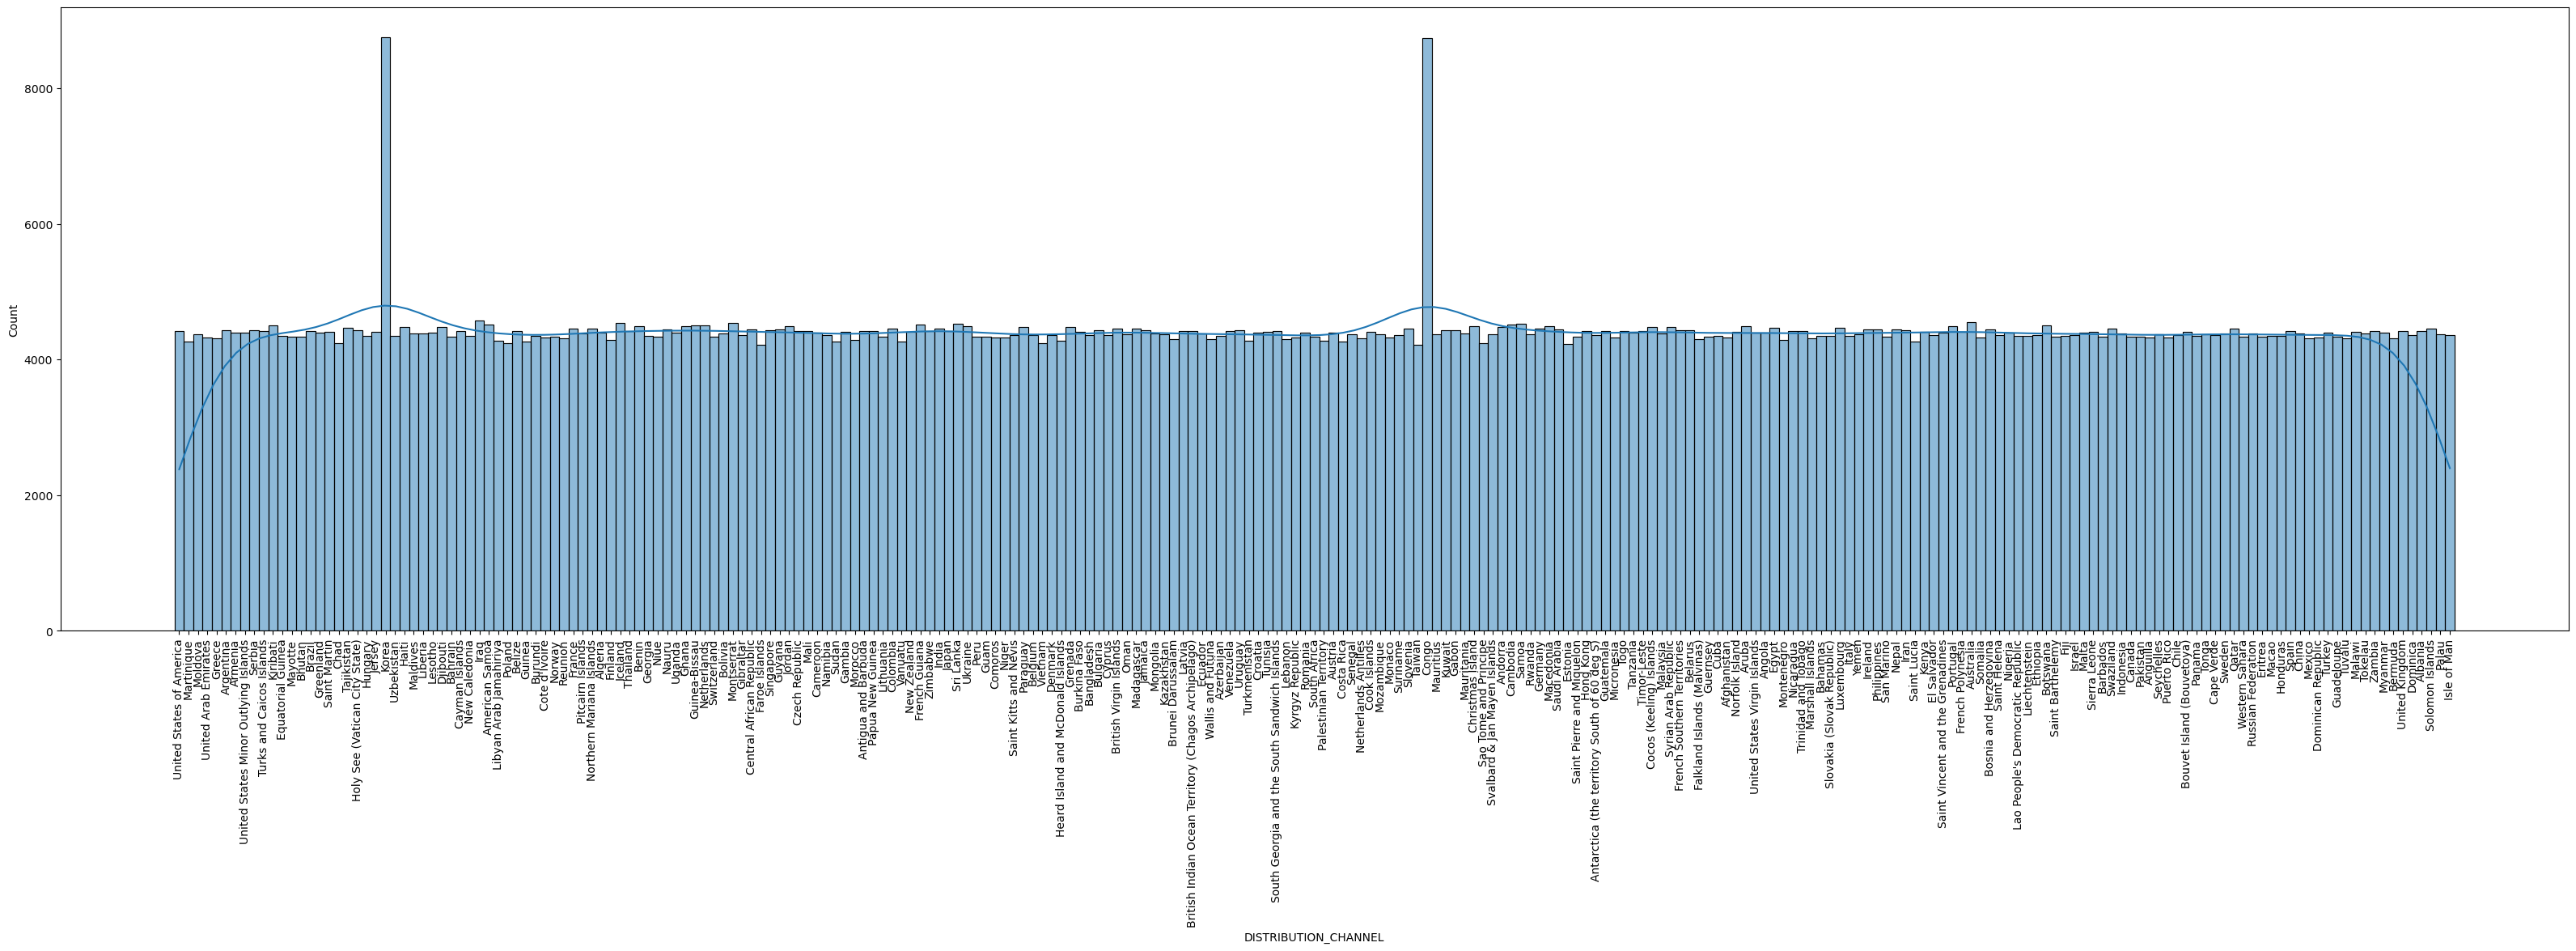

In [26]:
plt.figure(figsize=(40,10))
sns.histplot(data=df,x='DISTRIBUTION_CHANNEL',kde=True)
plt.xticks(rotation = 90)
plt.show() 

### 2.Create a Pie Chart on ORDER_CURRENCY

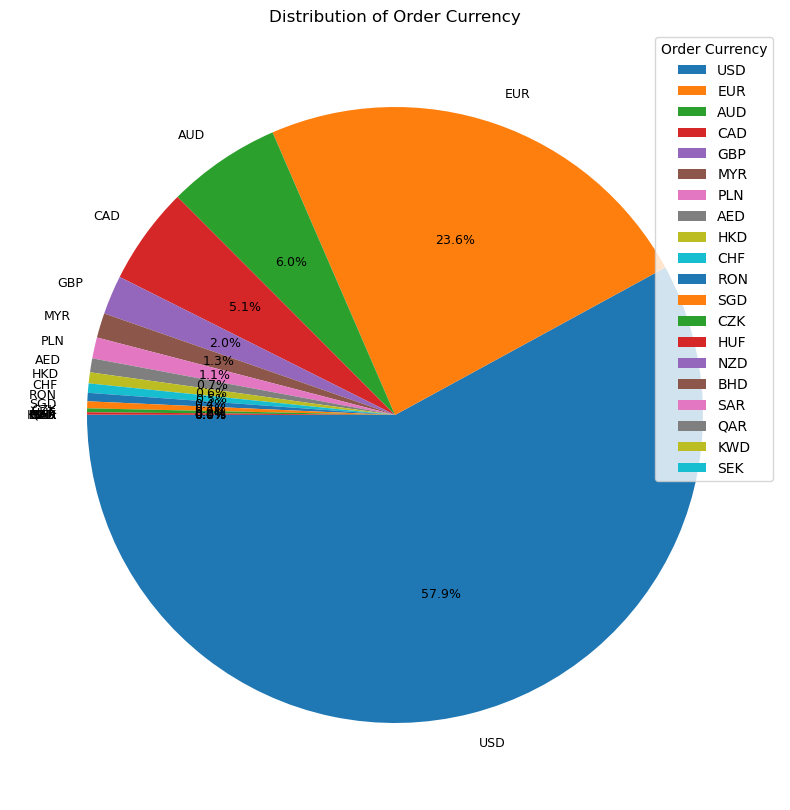

In [27]:
value_counts = df['ORDER_CURRENCY'].value_counts()
plt.figure(figsize=(30, 10))
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', startangle=180,textprops={'fontsize': 9})
plt.legend(title="Order Currency", loc='best')
plt.title('Distribution of Order Currency')
plt.show()

### 3.Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

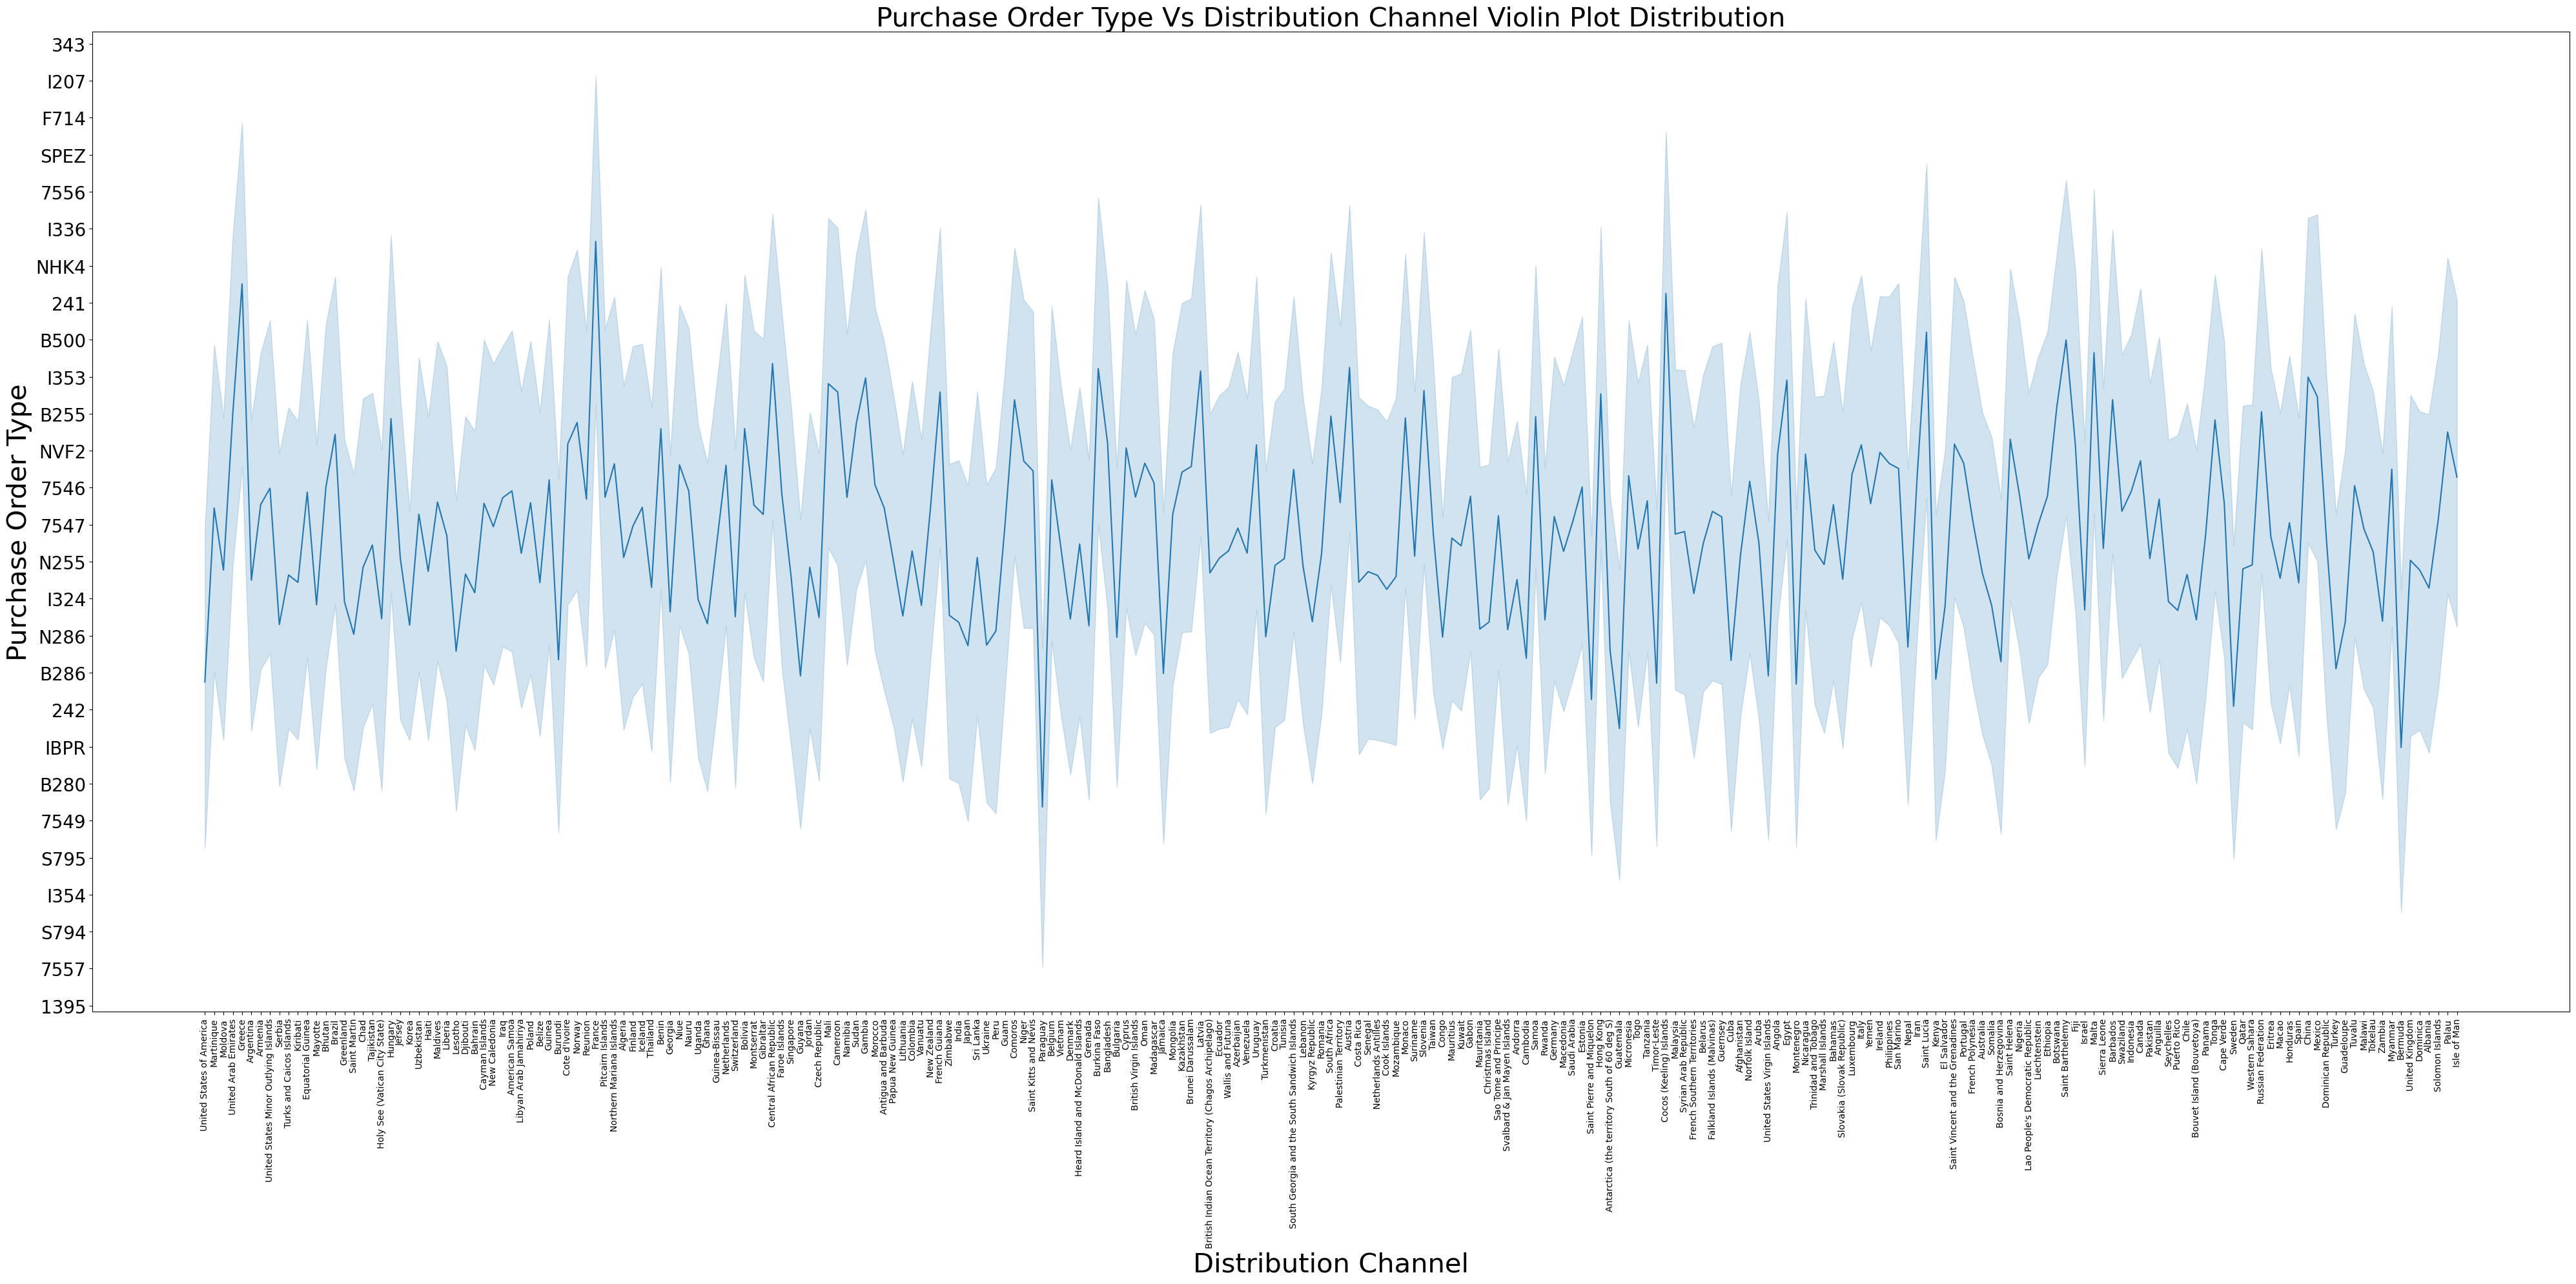

In [28]:
plt.figure(figsize=(40, 20))
sns.lineplot(data=df, x='DISTRIBUTION_CHANNEL', y='PURCHASE_ORDER_TYPE')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Distribution Channel', fontsize=30)
plt.ylabel('Purchase Order Type', fontsize=30)
plt.title('Purchase Order Type Vs Distribution Channel Violin Plot Distribution', fontsize=30)
plt.tight_layout()
plt.show()

### 4.Create a line plot on ORDER_CREATION_DATE and amount_in_usd

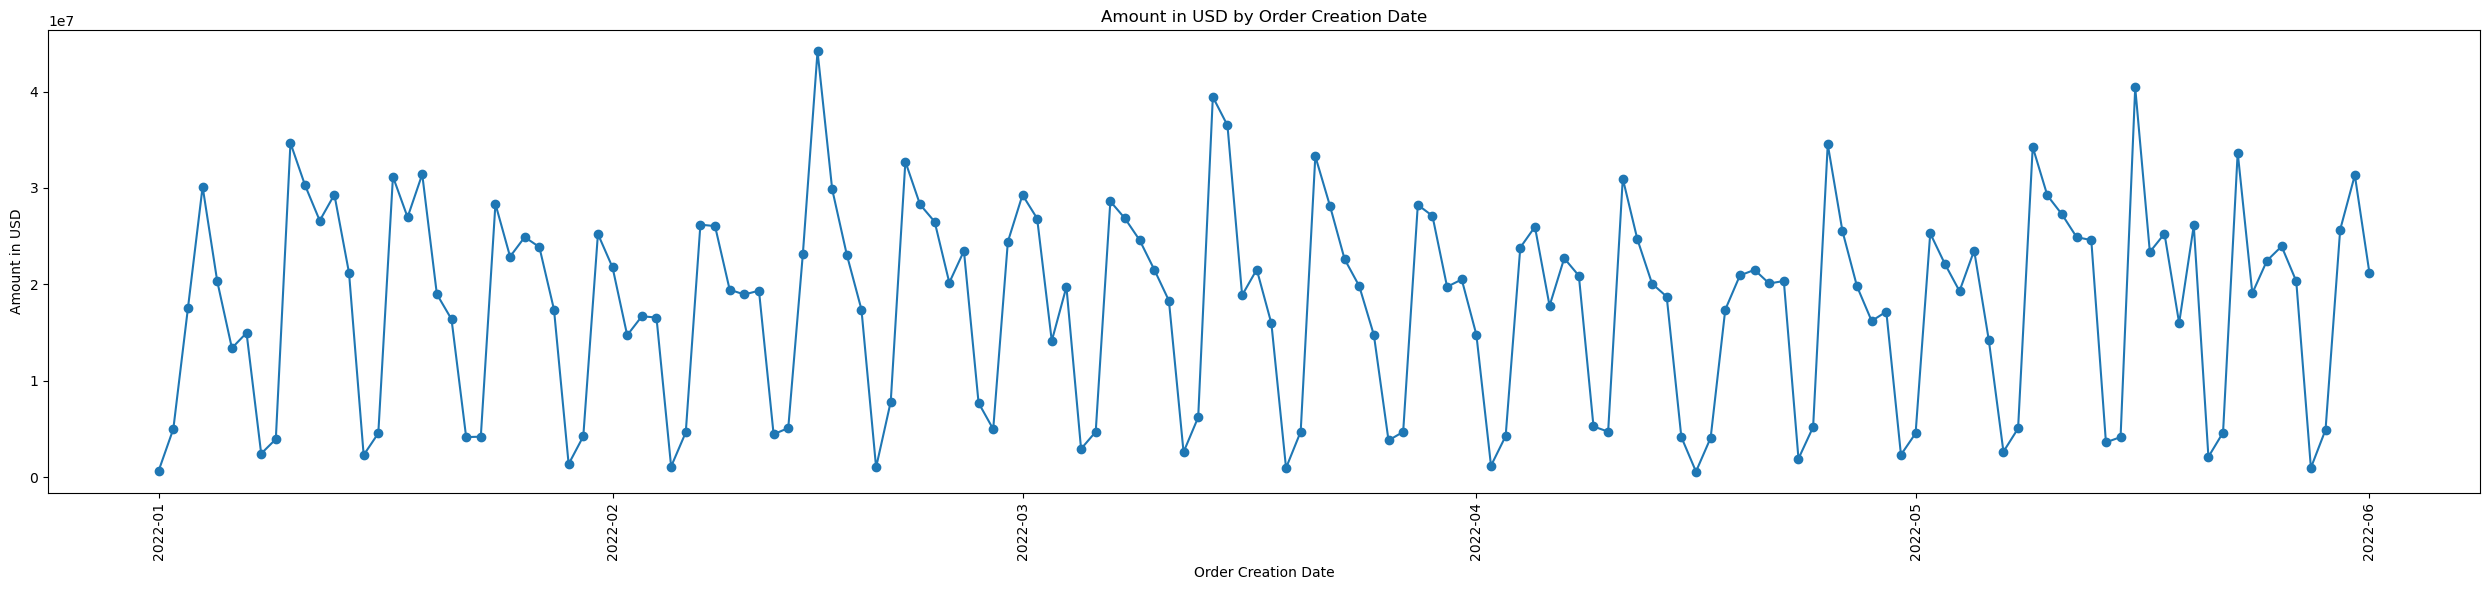

In [29]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90)
company_amount = df.groupby('ORDER_CREATION_DATE')['amount_in_usd'].sum()
plt.plot(company_amount, marker='o')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Amount in USD by Order Creation Date')
plt.tight_layout()
plt.show()

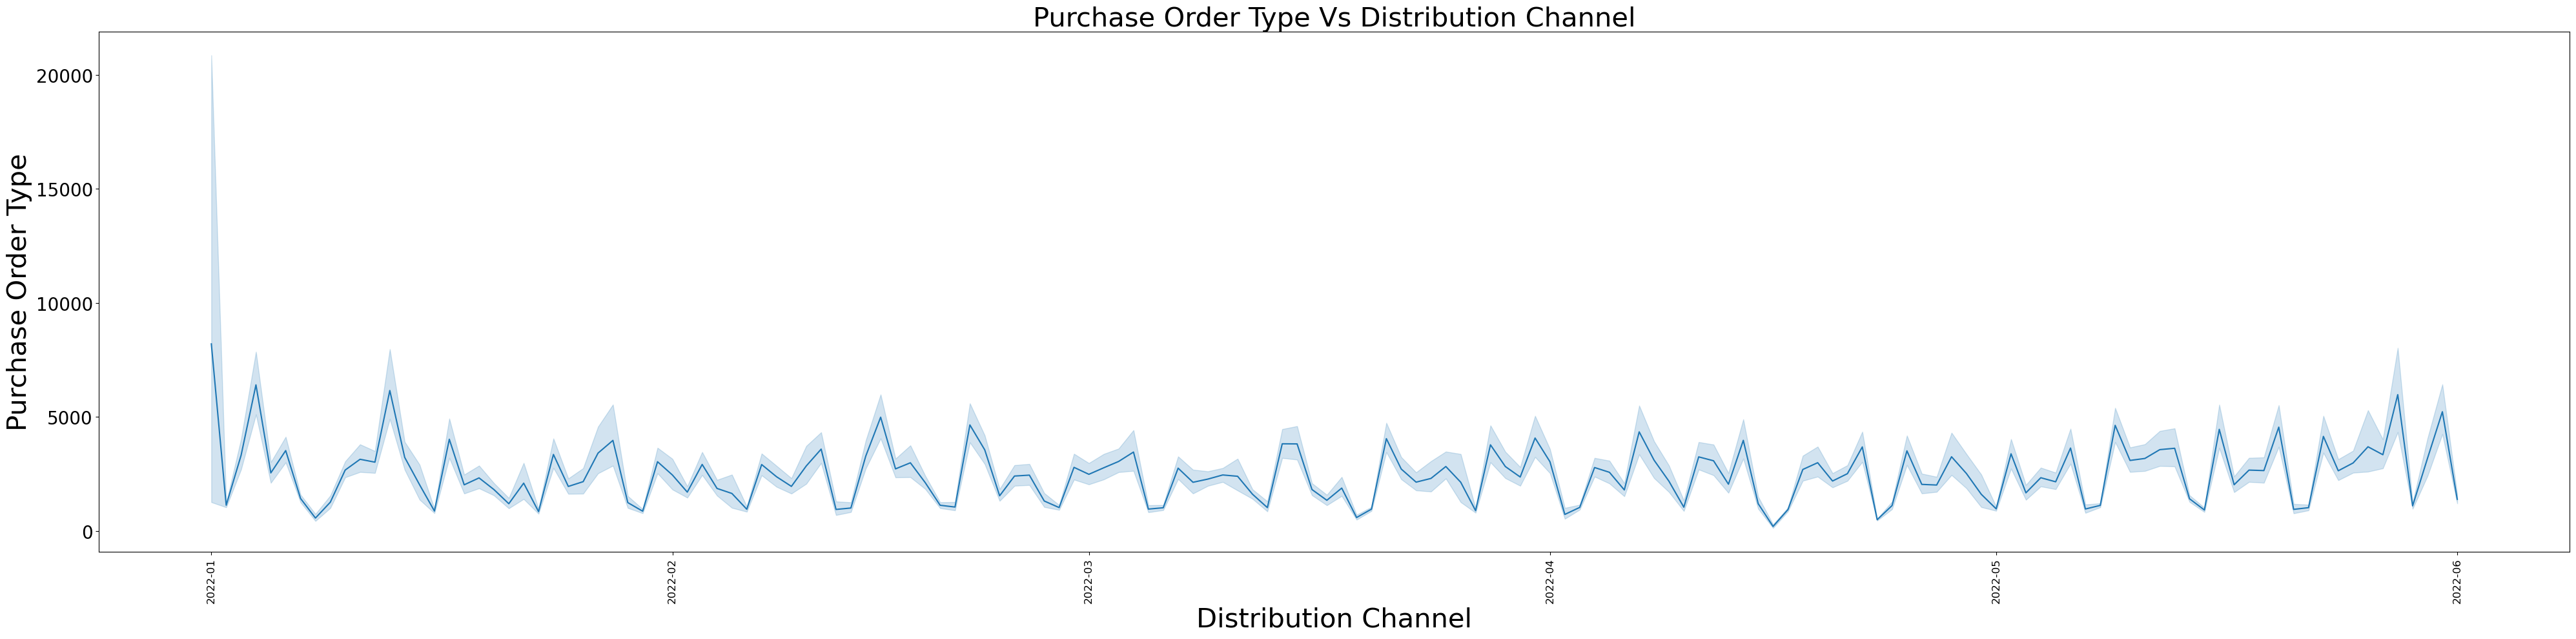

In [30]:
plt.figure(figsize=(40, 10))
sns.lineplot(data=df, x='ORDER_CREATION_DATE', y='amount_in_usd')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=20)
plt.xlabel('Distribution Channel', fontsize=30)
plt.ylabel('Purchase Order Type', fontsize=30)
plt.title('Purchase Order Type Vs Distribution Channel', fontsize=30)
plt.tight_layout()
plt.show()

### 5.Create a boxplot on ORDER_AMOUNT	to find out the outliers

### The 'Order amount' column contains amounts in different currencies. Therefore, to standardize the column, 'Amount_in_USD' has been chosen.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


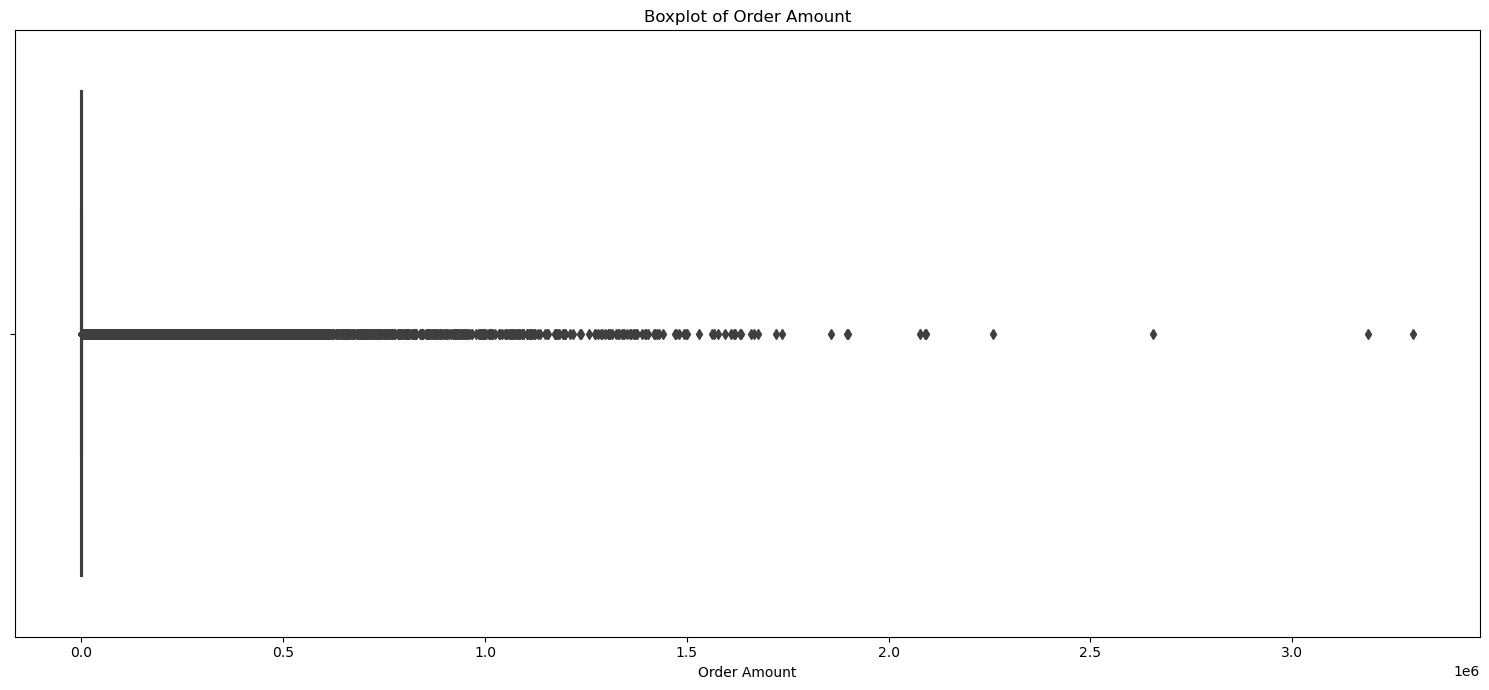

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(df['amount_in_usd'])
plt.xlabel('Order Amount')
plt.title('Boxplot of Order Amount')
plt.tight_layout()
plt.show()

### 6.Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


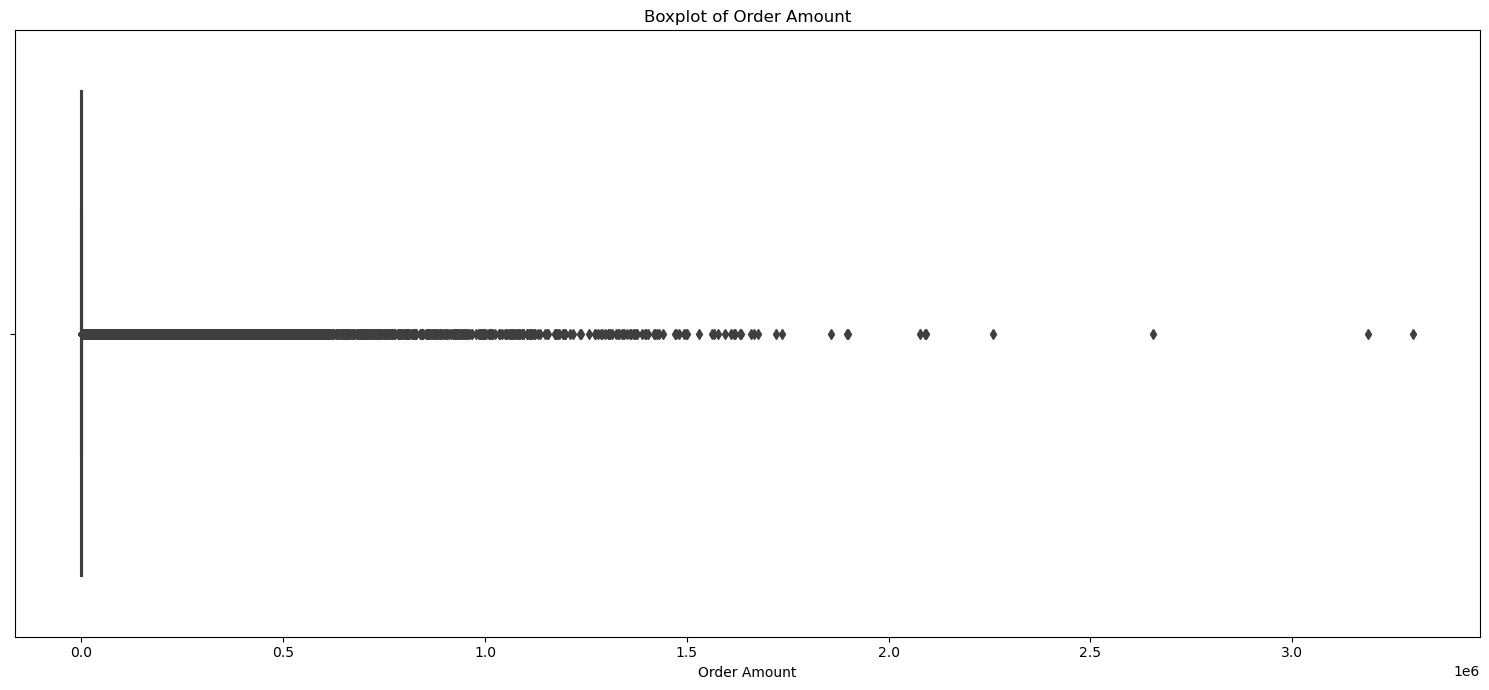

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(df['amount_in_usd'])
plt.xlabel('Order Amount')
plt.title('Boxplot of Order Amount')
plt.tight_layout()
plt.show()

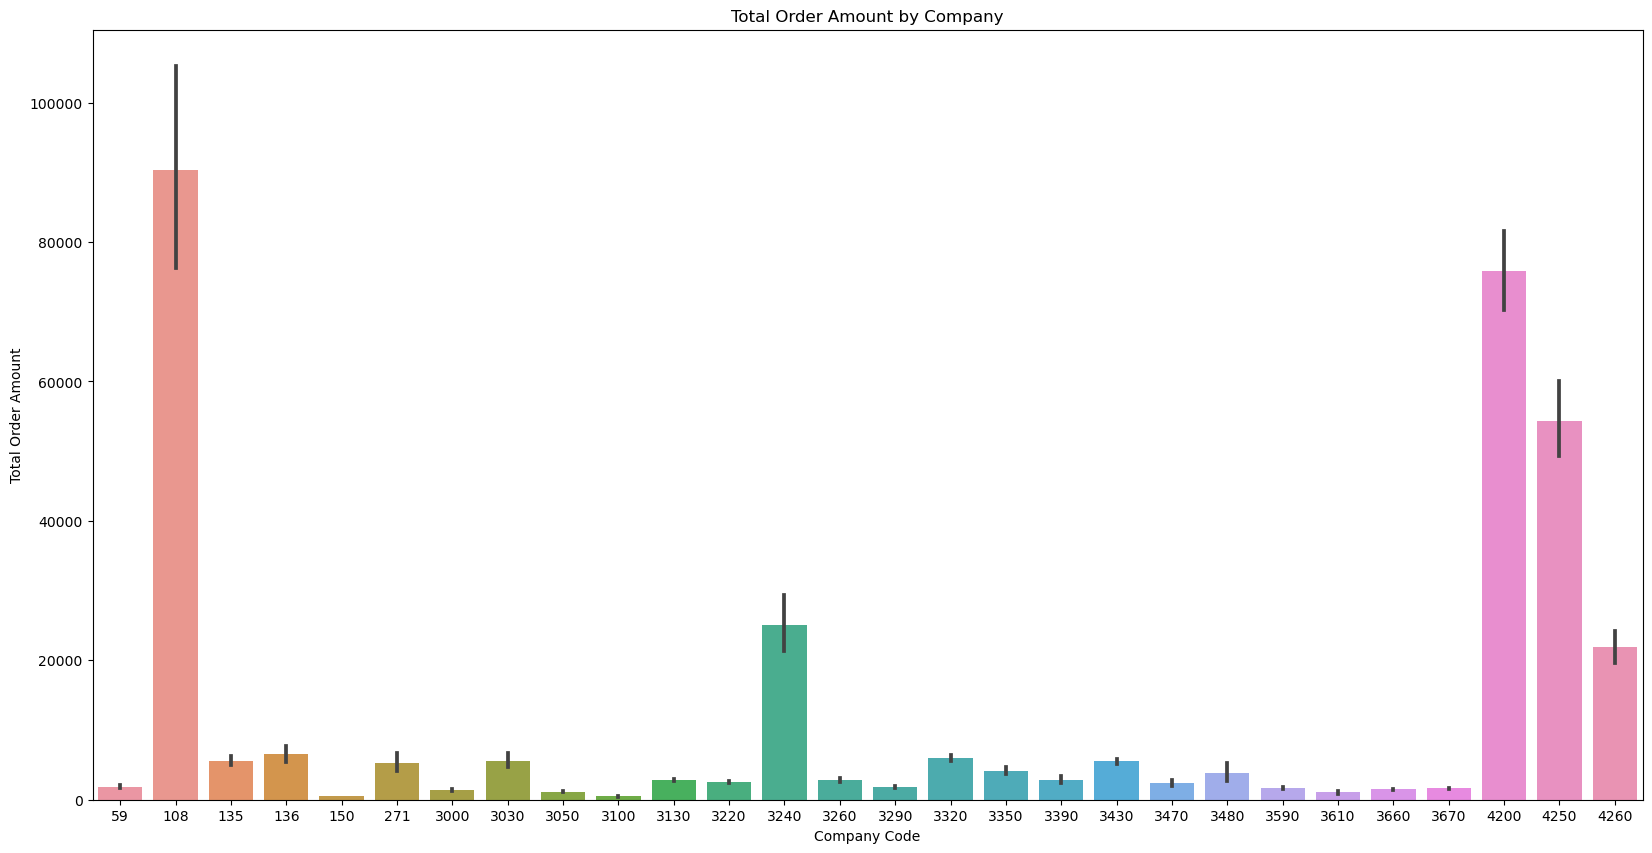

In [33]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df,x='COMPANY_CODE',y='amount_in_usd')
plt.xlabel('Company Code')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount by Company')
plt.show()

# Milestone 3 - Feature Engineering and Selection

In [34]:
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)  #This loop iterates from ffday to lags (inclusive) and calculates the lagged sales for each day.
    
    melt = melt.reset_index(drop = True)                                                             #This line resets the index of the DataFrame after the previous operation to ensure consecutive indices.
    
    for i in range(ffday, lags+1):                                                                   #This loop calculates the difference in sales between the current day and the previous 'lags' days for each customer.
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt

In [35]:
df=difference_in_days(df, 3, 1, 'CUSTOMER_ORDER_ID', 'ORDER_CREATION_DATE', 'amount_in_usd')
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,...,NaN,12311807,1002.3405,12315027,0.0,0.0,0.0,0.0,0.0,0.0
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,...,NaN,12311807,826.7280,12315027,0.0,0.0,0.0,0.0,0.0,0.0
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,...,93.0,12118758,70868.1330,12122018,0.0,0.0,0.0,0.0,0.0,0.0
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,...,93.0,1210499770,1475.8170,1210503060,0.0,0.0,0.0,0.0,0.0,0.0
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,...,64.0,1210351400,0.0000,1210354690,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,...,NaN,1210331804,3399.6963,1210336064,0.0,0.0,0.0,0.0,0.0,0.0
1074779,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,...,NaN,1210331804,0.0000,1210336064,0.0,0.0,0.0,0.0,0.0,0.0
1074780,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,...,NaN,1210331811,0.0000,1210336071,0.0,0.0,0.0,0.0,0.0,0.0
1074781,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,...,NaN,1210331811,0.0000,1210336071,0.0,0.0,0.0,0.0,0.0,0.0


### 1) Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_in_usd'>

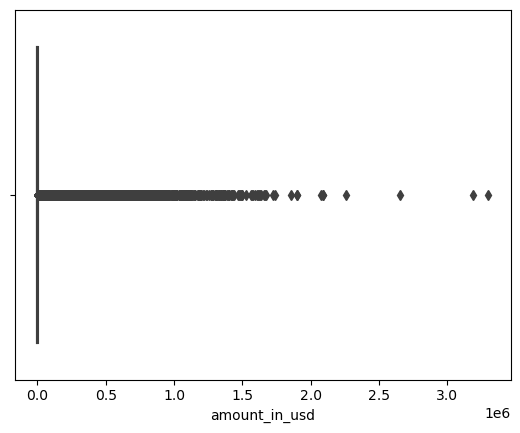

In [36]:
sns.boxplot(df['amount_in_usd'])  #create a boxplot visualization of the 'amount_in_usd' column in the DataFrame 'df'.

In [37]:
z_scores = np.abs((df['amount_in_usd'] - df['amount_in_usd'].mean()) / df['amount_in_usd'].std())
threshold = 3    #threshold is a value set to determine the cut-off for outliers. In this case, any z-score greater than 3 (or less than -3) is considered an outlier.
df['amount_in_usd'] = np.where(z_scores > threshold, df['amount_in_usd'].median(), df['amount_in_usd'])
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,...,NaN,12311807,1002.3405,12315027,0.0,0.0,0.0,0.0,0.0,0.0
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,...,NaN,12311807,826.7280,12315027,0.0,0.0,0.0,0.0,0.0,0.0
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,...,93.0,12118758,70868.1330,12122018,0.0,0.0,0.0,0.0,0.0,0.0
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,...,93.0,1210499770,1475.8170,1210503060,0.0,0.0,0.0,0.0,0.0,0.0
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,...,64.0,1210351400,0.0000,1210354690,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,...,NaN,1210331804,3399.6963,1210336064,0.0,0.0,0.0,0.0,0.0,0.0
1074779,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,...,NaN,1210331804,0.0000,1210336064,0.0,0.0,0.0,0.0,0.0,0.0
1074780,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,...,NaN,1210331811,0.0000,1210336071,0.0,0.0,0.0,0.0,0.0,0.0
1074781,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,...,NaN,1210331811,0.0000,1210336071,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_in_usd'>

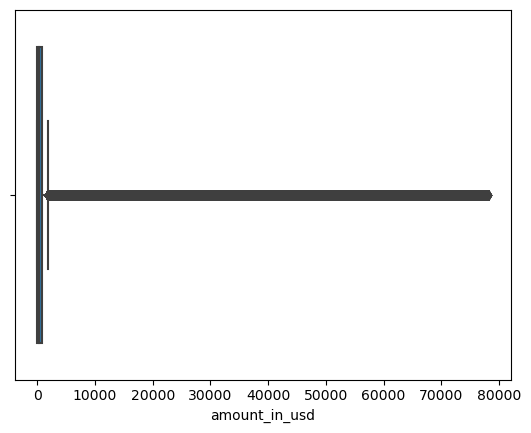

In [38]:
sns.boxplot(df['amount_in_usd'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074783 entries, 0 to 1074782
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  object        
 3   DIVISION                 1074783 non-null  object        
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object        
 5   PURCHASE_ORDER_TYPE      1074783 non-null  object        
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  object        
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 12  

### 2) Label encoding or One hot Encoding on all the categorical columns 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074783 entries, 0 to 1074782
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  object        
 3   DIVISION                 1074783 non-null  object        
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object        
 5   PURCHASE_ORDER_TYPE      1074783 non-null  object        
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  object        
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 12  

In [41]:
from sklearn.preprocessing import LabelEncoder
categorical = []
continuous = []

#Creating two empty lists, categorical and continuous, to store the column names of categorical and continuous features, respectively.
for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        continuous.append(col)

#Creating an instance of the LabelEncoder class, which will be used for label encoding.
label_encoder = LabelEncoder()
for col in categorical:
    if df[col].dtype == 'float' or df[col].dtype == 'int':
        df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col].astype(str))

#This loop iterates over each categorical column again, applying label encoding using the fitted label encoder. This step ensures that the label encoding is applied consistently across all categorical columns.
for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff
0,946851639,3537,232,1,1,0,3220,2022-01-01,43012,5,...,3,12311807,1002.3405,12315027,0.0,0.0,0.0,0.0,0.0,0.0
1,963432061,3449,135,1,1,0,3220,2022-01-01,43114,2,...,3,12311807,826.7280,12315027,0.0,0.0,0.0,0.0,0.0,0.0
2,971991639,3238,141,1,43496,204,3260,2022-01-01,110019,0,...,2,12118758,70868.1330,12122018,0.0,0.0,0.0,0.0,0.0,0.0
3,754349803,3911,228,1,7852,255,3290,2022-01-01,153013,5,...,2,1210499770,1475.8170,1210503060,0.0,0.0,0.0,0.0,0.0,0.0
4,930253442,2381,82,1,1,255,3290,2022-01-01,160020,4,...,1,1210351400,0.0000,1210354690,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,853605710,2498,79,1,1,306,4260,2022-06-01,74357,1,...,3,1210331804,3399.6963,1210336064,0.0,0.0,0.0,0.0,0.0,0.0
1074779,998890898,4509,10,1,1,306,4260,2022-06-01,84052,3,...,3,1210331804,0.0000,1210336064,0.0,0.0,0.0,0.0,0.0,0.0
1074780,983330221,3951,151,1,1,306,4260,2022-06-01,85322,0,...,3,1210331811,0.0000,1210336071,0.0,0.0,0.0,0.0,0.0,0.0
1074781,926668029,3235,167,1,1,306,4260,2022-06-01,90538,7,...,3,1210331811,0.0000,1210336071,0.0,0.0,0.0,0.0,0.0,0.0


### 3) Log Transformations on continuous columns 

In [42]:
#The natural logarithm transformation is commonly used to reduce the skewness of data, especially when dealing with continuous features that have a long-tailed distribution.
#The loop iterates over each column in the 'continuous' list, which contains the names of continuous features.
#If the data type is not 'datetime64[ns]', the natural logarithm transformation np.log1p() is applied to the values in that column.

for col in continuous:
    if df[col].dtype != 'datetime64[ns]':  
        df[col] = df[col].apply(lambda x: np.log1p(x))

In [43]:
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,Last-1day_Sales,Last-2day_Sales,Last-3day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,3,16.326069,6.911090,16.326331,0.0,0.0,0.0,0.0,0.0,0.0
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,...,3,16.326069,6.718685,16.326331,0.0,0.0,0.0,0.0,0.0,0.0
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,...,2,16.310265,11.168590,16.310534,0.0,0.0,0.0,0.0,0.0,0.0
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,...,2,20.914299,7.297644,20.914302,0.0,0.0,0.0,0.0,0.0,0.0
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,...,1,20.914177,0.000000,20.914179,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,20.564980,7.823646,79,1,1,306,8.357259,2022-06-01,11.216647,1,...,3,20.914160,8.131735,20.914164,0.0,0.0,0.0,0.0,0.0,0.0
1074779,20.722156,8.414052,10,1,1,306,8.357259,2022-06-01,11.339203,3,...,3,20.914160,0.000000,20.914164,0.0,0.0,0.0,0.0,0.0,0.0
1074780,20.706456,8.281977,151,1,1,306,8.357259,2022-06-01,11.354199,0,...,3,20.914160,0.000000,20.914164,0.0,0.0,0.0,0.0,0.0,0.0
1074781,20.647106,8.082093,167,1,1,306,8.357259,2022-06-01,11.413536,7,...,3,20.914160,0.000000,20.914164,0.0,0.0,0.0,0.0,0.0,0.0


### 4) Try to extract new features by grouping existing columns 

In [44]:
#performs groupby and aggregation operations on the DataFrame 'df' based on the 'SALES_ORG' column.

grouped_df = df.groupby('SALES_ORG').agg({     
    'ORDER_AMOUNT': ['mean'],
    'RELEASED_CREDIT_VALUE': ['sum'],
    'CUSTOMER_NUMBER': ['nunique'],
    'amount_in_usd': ['max']
}).reset_index()                            #The groupby() function is used to group the rows of the DataFrame 'df' based on the 'SALES_ORG' column.

grouped_df.columns = ['SALES_ORG', 'avg_order_amount', 'total_credit_value', 'unique_customers', 'max_amount_usd']  #This line assigns new column names to the columns of the 'grouped_df' DataFrame.

grouped_df

,SALES_ORG,avg_order_amount,total_credit_value,unique_customers,max_amount_usd
0,7.650169,4.495421,609429,141,11.146446
1,7.650645,4.764598,723167,129,10.945300
2,7.651120,4.760109,594668,116,11.008478
3,7.651596,4.693573,667986,124,11.065715
4,7.652071,4.564189,806552,137,11.133267
...,...,...,...,...,...
2406,8.413387,4.887688,613023,143,10.791433
2407,8.413609,4.784492,620833,122,11.084786
2408,8.413831,4.789962,775251,139,11.264047
2409,8.414052,4.757516,487248,146,10.878932


### 5) Create a heatmap to find correlation between the columns

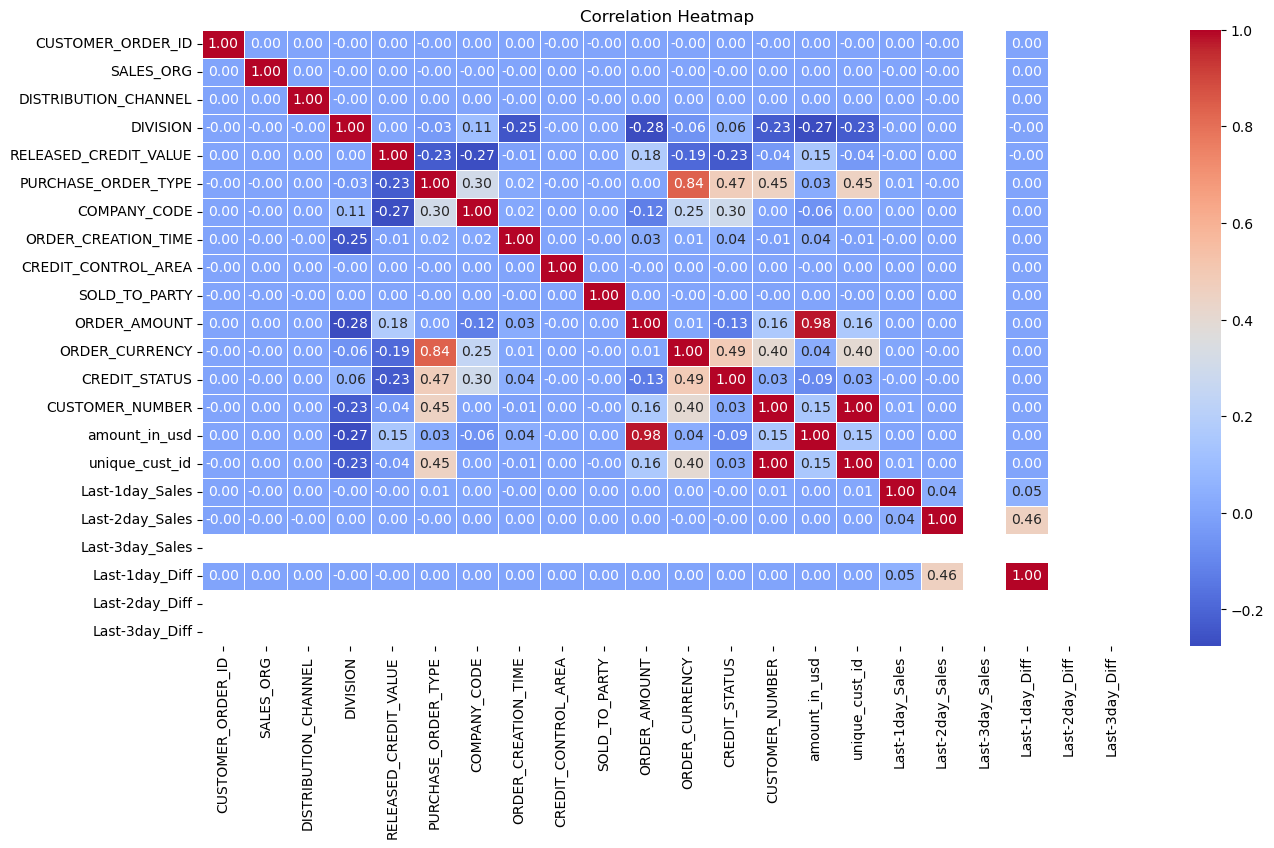

In [45]:
correlation_matrix = df.corr()   #The corr() function is used to compute the pairwise correlation of columns in the DataFrame 'df'.
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#The resulting plot will show a heatmap where the colors represent the correlation strength between different pairs of columns in the DataFrame 'df'. The annotation values provide the correlation coefficients.

### 6) Try to identify important or relevant columns for feature extraction

In [46]:
#code provided calculates the correlation matrix for the DataFrame 'df', identifies pairs of columns that have a correlation coefficient greater than 0.4 in absolute value, and prints those pairs.
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.4)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[('PURCHASE_ORDER_TYPE', 'ORDER_CURRENCY'), ('PURCHASE_ORDER_TYPE', 'CREDIT_STATUS'), ('PURCHASE_ORDER_TYPE', 'CUSTOMER_NUMBER'), ('PURCHASE_ORDER_TYPE', 'unique_cust_id'), ('ORDER_AMOUNT', 'amount_in_usd'), ('ORDER_CURRENCY', 'CREDIT_STATUS'), ('CUSTOMER_NUMBER', 'unique_cust_id'), ('Last-2day_Sales', 'Last-1day_Diff')]


In [47]:
#calculates the correlation matrix for the DataFrame 'df' and selects the columns that have a correlation coefficient greater than 0.1 with the 'amount_in_usd' column. 
corr_matrix = df.corr()
correlated_features = corr_matrix.loc[corr_matrix['amount_in_usd'] > 0.1, corr_matrix['amount_in_usd'] > 0.1]
print(correlated_features.columns)
#The output will be the column names of the features that are highly correlated (correlation coefficient greater than 0.1) with the 'amount_in_usd' column.

Index(['RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT', 'CUSTOMER_NUMBER',
       'amount_in_usd', 'unique_cust_id'],
      dtype='object')


In [48]:
df['REQUESTED_DELIVERY_MONTH']=df['REQUESTED_DELIVERY_DATE'].dt.month
df['REQUESTED_DELIVERY_YEAR']=df['REQUESTED_DELIVERY_DATE'].dt.year
df['REQUESTED_DELIVERY_DAY']=df['REQUESTED_DELIVERY_DATE'].dt.day
df['REQUESTED_CREATION_START_WEEK_DAY']=df['REQUESTED_DELIVERY_DATE'].dt.weekday
df['REQUESTED_CREATION_START_YEAR_WEEK'] = df['REQUESTED_DELIVERY_DATE'].dt.week

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10840\203963598.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['REQUESTED_CREATION_START_YEAR_WEEK'] = df['REQUESTED_DELIVERY_DATE'].dt.week


In [49]:
df['ORDER_CREATION_MONTH']=df['ORDER_CREATION_DATE'].dt.month
df['ORDER_CREATION_YEAR']=df['ORDER_CREATION_DATE'].dt.year
df['ORDER_CREATION_DAY']=df['ORDER_CREATION_DATE'].dt.day
df['ORDER_CREATION_START_WEEK_DAY']=df['ORDER_CREATION_DATE'].dt.weekday
df['ORDER_CREATION_START_YEAR_WEEK'] = df['ORDER_CREATION_DATE'].dt.week

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10840\3003733248.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['ORDER_CREATION_START_YEAR_WEEK'] = df['ORDER_CREATION_DATE'].dt.week


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074783 entries, 0 to 1074782
Data columns (total 34 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   CUSTOMER_ORDER_ID                   1074783 non-null  float64       
 1   SALES_ORG                           1074783 non-null  float64       
 2   DISTRIBUTION_CHANNEL                1074783 non-null  int64         
 3   DIVISION                            1074783 non-null  int64         
 4   RELEASED_CREDIT_VALUE               1074783 non-null  int64         
 5   PURCHASE_ORDER_TYPE                 1074783 non-null  int64         
 6   COMPANY_CODE                        1074783 non-null  float64       
 7   ORDER_CREATION_DATE                 1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME                 1074783 non-null  float64       
 9   CREDIT_CONTROL_AREA                 1074783 non-null  int64         

# Milestone 4 - ML Models and Evaluations

### 1.  Modify the dataset to pass into any type of machine learning models. 

In [51]:
count = df.groupby(['DISTRIBUTION_CHANNEL', 'amount_in_usd']).size().reset_index(name='order_count')
df = df.merge(count, on=['DISTRIBUTION_CHANNEL', 'amount_in_usd'], how='left')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,REQUESTED_DELIVERY_YEAR,REQUESTED_DELIVERY_DAY,REQUESTED_CREATION_START_WEEK_DAY,REQUESTED_CREATION_START_YEAR_WEEK,ORDER_CREATION_MONTH,ORDER_CREATION_YEAR,ORDER_CREATION_DAY,ORDER_CREATION_START_WEEK_DAY,ORDER_CREATION_START_YEAR_WEEK,order_count
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,2022,13,3,2,1,2022,1,5,52,1
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,...,2022,11,1,2,1,2022,1,5,52,1
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,...,2022,12,2,2,1,2022,1,5,52,1
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,...,2022,6,3,1,1,2022,1,5,52,1
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,...,2022,6,3,1,1,2022,1,5,52,947


In [52]:
median = df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL']).agg(AMOUNT_MEDIAN=('amount_in_usd', 'median'))
df = df.merge(median, on=['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'], how='left')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,REQUESTED_DELIVERY_DAY,REQUESTED_CREATION_START_WEEK_DAY,REQUESTED_CREATION_START_YEAR_WEEK,ORDER_CREATION_MONTH,ORDER_CREATION_YEAR,ORDER_CREATION_DAY,ORDER_CREATION_START_WEEK_DAY,ORDER_CREATION_START_YEAR_WEEK,order_count,AMOUNT_MEDIAN
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,13,3,2,1,2022,1,5,52,1,6.500701
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,...,11,1,2,1,2022,1,5,52,1,6.146825
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,...,12,2,2,1,2022,1,5,52,1,7.903606
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,...,6,3,1,1,2022,1,5,52,1,3.139680
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,...,6,3,1,1,2022,1,5,52,947,4.463013


In [53]:
data = df.groupby(['PURCHASE_ORDER_TYPE']).agg({'amount_in_usd': ['mean', 'sum'], 'unique_cust_id': 'nunique'}).reset_index()
data.columns = ['PURCHASE_ORDER_TYPE', 'mean amount', 'sum amount', 'Count_of_unique_cust']
df = df.merge(data, on='PURCHASE_ORDER_TYPE', how='left')
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,ORDER_CREATION_MONTH,ORDER_CREATION_YEAR,ORDER_CREATION_DAY,ORDER_CREATION_START_WEEK_DAY,ORDER_CREATION_START_YEAR_WEEK,order_count,AMOUNT_MEDIAN,mean amount,sum amount,Count_of_unique_cust
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,1,2022,1,5,52,1,6.500701,5.622875,76791.599852,45
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,...,1,2022,1,5,52,1,6.146825,5.622875,76791.599852,45
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,...,1,2022,1,5,52,1,7.903606,7.401577,34350.718817,365
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,...,1,2022,1,5,52,1,3.139680,2.973027,40019.916250,302
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,...,1,2022,1,5,52,947,4.463013,2.973027,40019.916250,302


In [54]:
df.dropna()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,ORDER_CREATION_MONTH,ORDER_CREATION_YEAR,ORDER_CREATION_DAY,ORDER_CREATION_START_WEEK_DAY,ORDER_CREATION_START_YEAR_WEEK,order_count,AMOUNT_MEDIAN,mean amount,sum amount,Count_of_unique_cust
0,20.668653,8.171317,232,1,1,0,8.077447,2022-01-01,10.669258,5,...,1,2022,1,5,52,1,6.500701,5.622875,76791.599852,45
1,20.686013,8.146130,135,1,1,0,8.077447,2022-01-01,10.671626,2,...,1,2022,1,5,52,1,6.146825,5.622875,76791.599852,45
2,20.694858,8.083020,141,1,43496,204,8.089789,2022-01-01,11.608417,0,...,1,2022,1,5,52,1,7.903606,7.401577,34350.718817,365
3,20.441367,8.271804,228,1,7852,255,8.098947,2022-01-01,11.938285,5,...,1,2022,1,5,52,1,3.139680,2.973027,40019.916250,302
4,20.650968,7.775696,82,1,1,255,8.098947,2022-01-01,11.983060,4,...,1,2022,1,5,52,947,4.463013,2.973027,40019.916250,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074778,20.564980,7.823646,79,1,1,306,8.357259,2022-06-01,11.216647,1,...,6,2022,1,2,22,1,4.301684,4.409438,82412.391210,963
1074779,20.722156,8.414052,10,1,1,306,8.357259,2022-06-01,11.339203,3,...,6,2022,1,2,22,983,4.231514,4.409438,82412.391210,963
1074780,20.706456,8.281977,151,1,1,306,8.357259,2022-06-01,11.354199,0,...,6,2022,1,2,22,1018,4.394676,4.409438,82412.391210,963
1074781,20.647106,8.082093,167,1,1,306,8.357259,2022-06-01,11.413536,7,...,6,2022,1,2,22,1023,4.228829,4.409438,82412.391210,963


<AxesSubplot:>

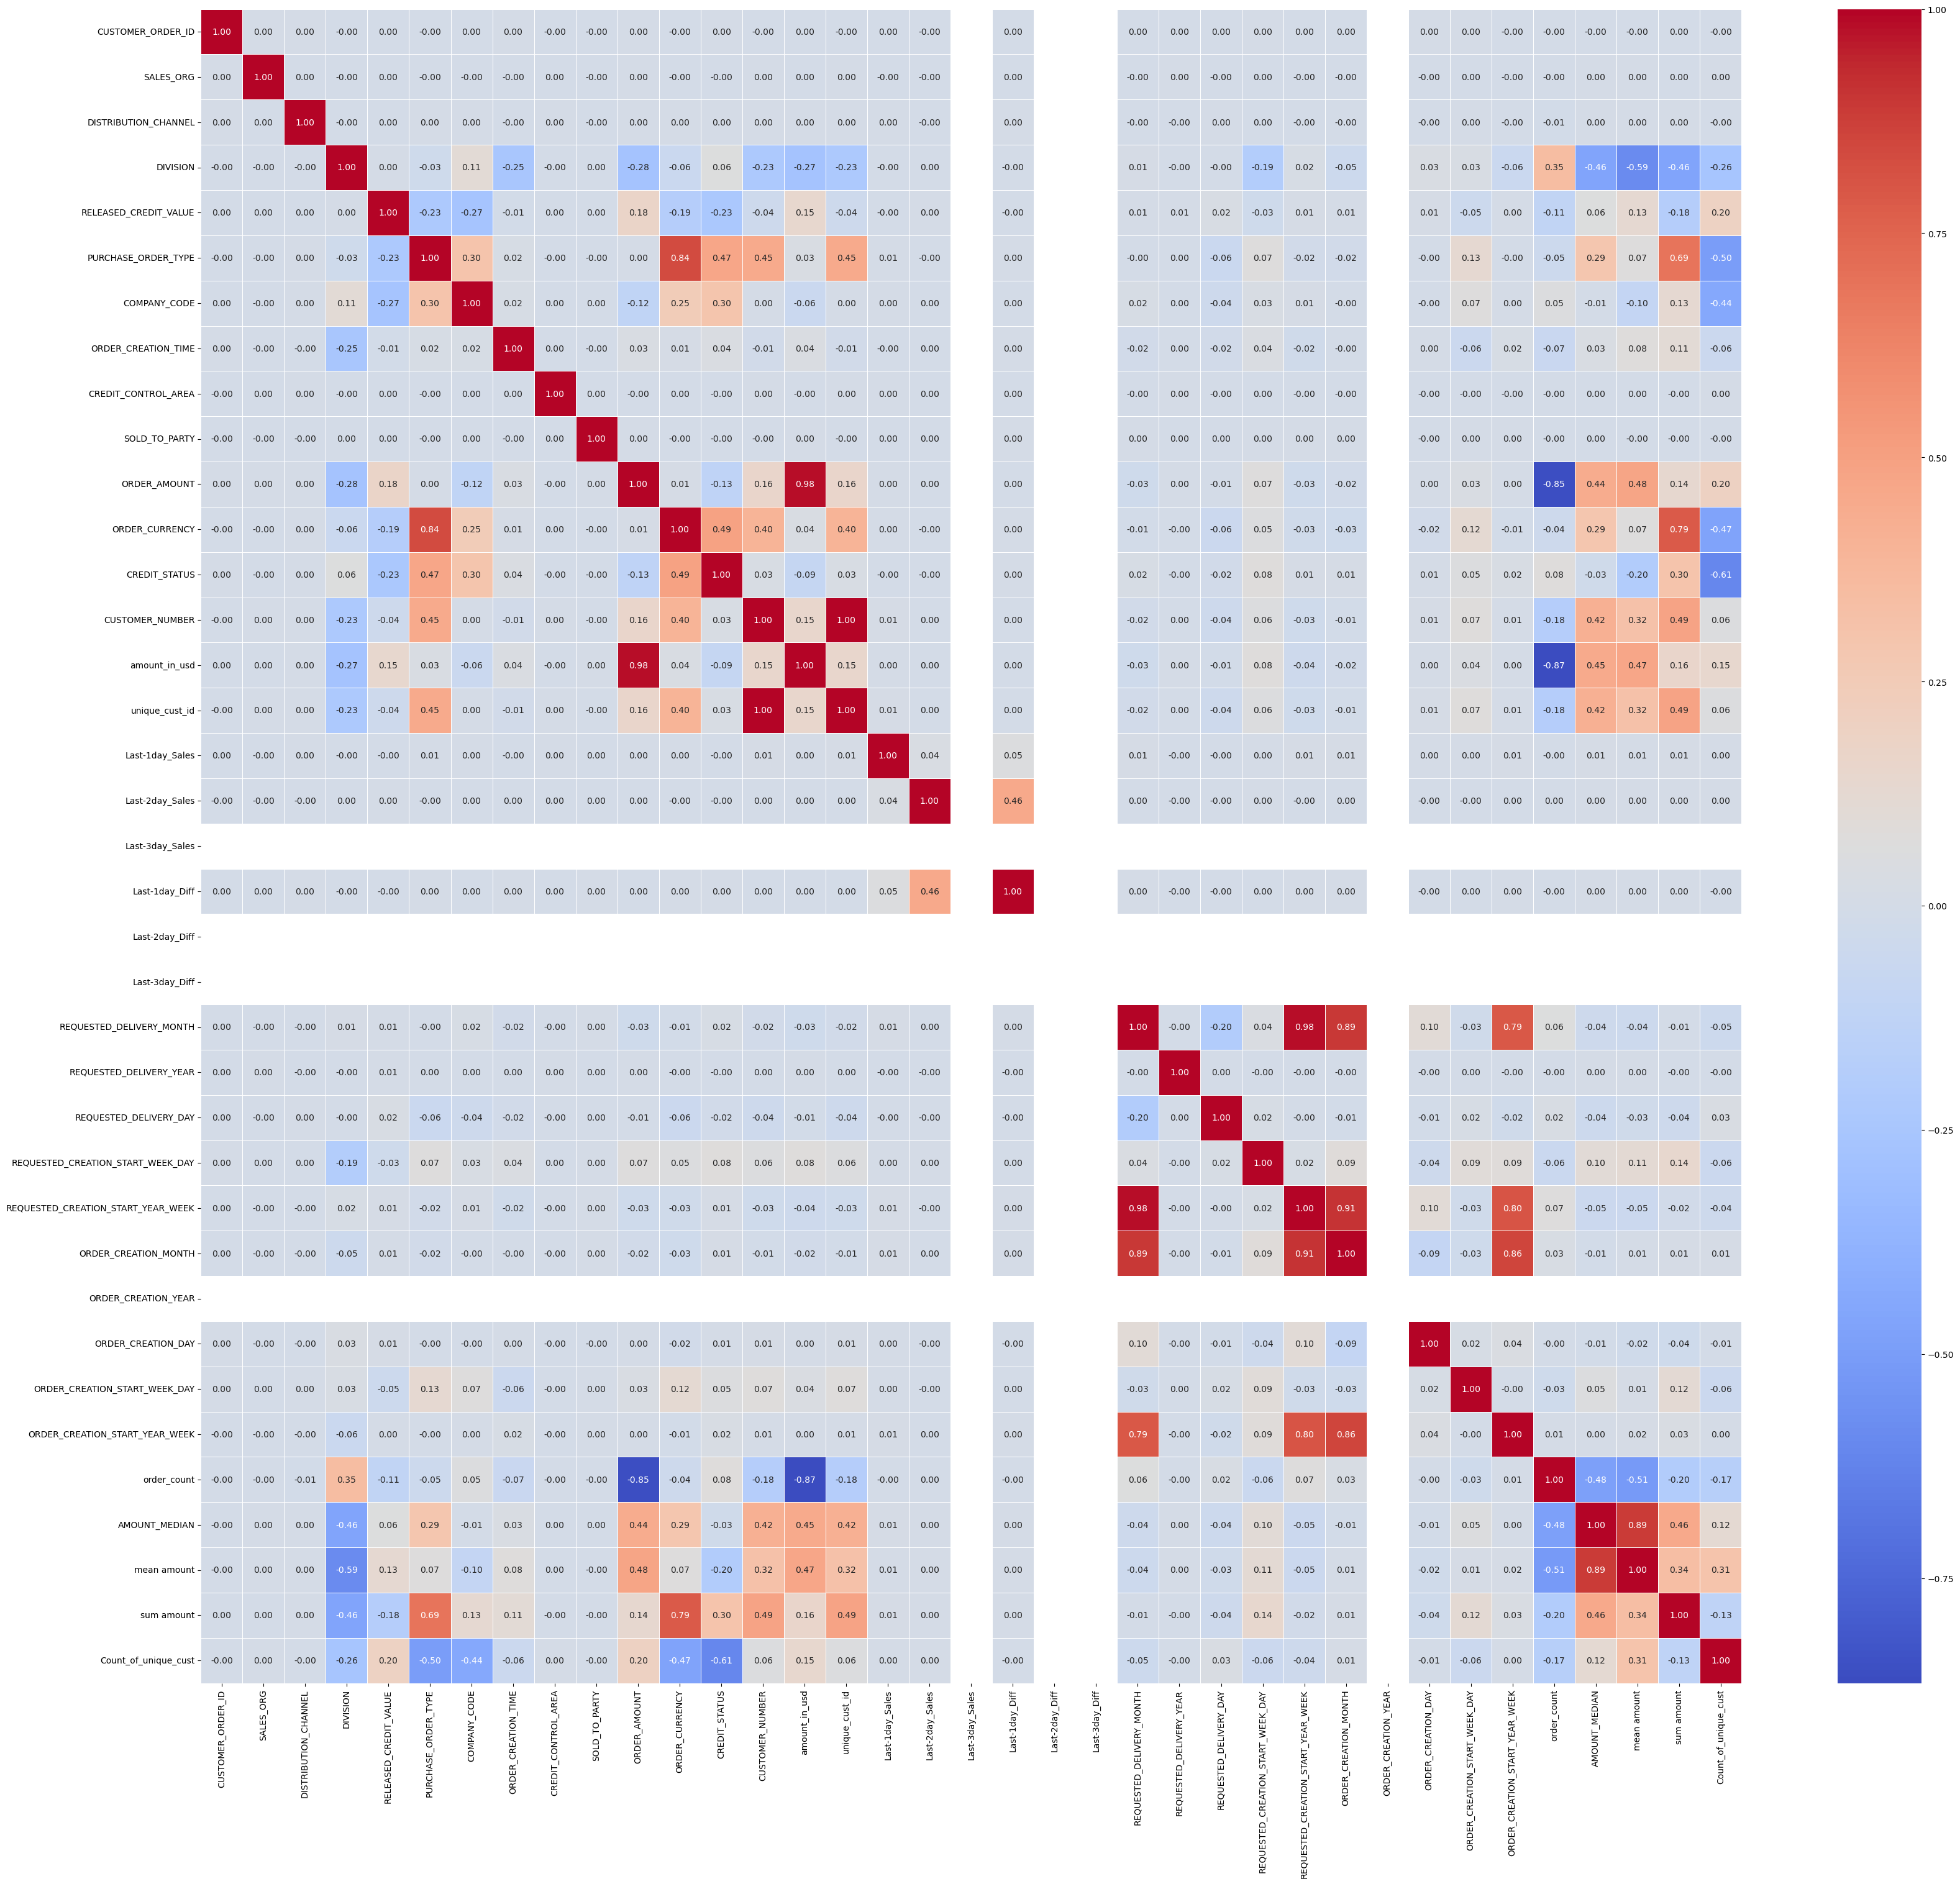

In [55]:
plt.figure(figsize = (40, 35))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', linewidths=0.5,fmt='.2f')

In [56]:
df.corr()['amount_in_usd']

CUSTOMER_ORDER_ID                     0.000740
SALES_ORG                             0.000681
DISTRIBUTION_CHANNEL                  0.001635
DIVISION                             -0.274618
RELEASED_CREDIT_VALUE                 0.146507
PURCHASE_ORDER_TYPE                   0.032722
COMPANY_CODE                         -0.062663
ORDER_CREATION_TIME                   0.038002
CREDIT_CONTROL_AREA                  -0.000092
SOLD_TO_PARTY                         0.001856
ORDER_AMOUNT                          0.979416
ORDER_CURRENCY                        0.037218
CREDIT_STATUS                        -0.090148
CUSTOMER_NUMBER                       0.152171
amount_in_usd                         1.000000
unique_cust_id                        0.152171
Last-1day_Sales                       0.001588
Last-2day_Sales                       0.000058
Last-3day_Sales                            NaN
Last-1day_Diff                        0.000699
Last-2day_Diff                             NaN
Last-3day_Dif

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1074782
Data columns (total 39 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   CUSTOMER_ORDER_ID                   1074783 non-null  float64       
 1   SALES_ORG                           1074783 non-null  float64       
 2   DISTRIBUTION_CHANNEL                1074783 non-null  int64         
 3   DIVISION                            1074783 non-null  int64         
 4   RELEASED_CREDIT_VALUE               1074783 non-null  int64         
 5   PURCHASE_ORDER_TYPE                 1074783 non-null  int64         
 6   COMPANY_CODE                        1074783 non-null  float64       
 7   ORDER_CREATION_DATE                 1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME                 1074783 non-null  float64       
 9   CREDIT_CONTROL_AREA                 1074783 non-null  int64         

In [58]:
df.isna().sum()  #calculates the sum of missing values for each column in the DataFrame 'df'

CUSTOMER_ORDER_ID                     0
SALES_ORG                             0
DISTRIBUTION_CHANNEL                  0
DIVISION                              0
RELEASED_CREDIT_VALUE                 0
PURCHASE_ORDER_TYPE                   0
COMPANY_CODE                          0
ORDER_CREATION_DATE                   0
ORDER_CREATION_TIME                   0
CREDIT_CONTROL_AREA                   0
SOLD_TO_PARTY                         0
ORDER_AMOUNT                          0
REQUESTED_DELIVERY_DATE               0
ORDER_CURRENCY                        0
CREDIT_STATUS                         0
CUSTOMER_NUMBER                       0
amount_in_usd                         0
unique_cust_id                        0
Last-1day_Sales                       0
Last-2day_Sales                       0
Last-3day_Sales                       0
Last-1day_Diff                        3
Last-2day_Diff                        0
Last-3day_Diff                        0
REQUESTED_DELIVERY_MONTH              0


### 2. Try different machine learning models like - 
Linear Regression,
Support Vector Machine, 
Decision Tree,
Random Forest,
AdaBoost,
Xgboost etc. 


In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
df=df.drop('REQUESTED_DELIVERY_DATE',axis=1)   #Remove the 'REQUESTED_DELIVERY_DATE' column from the DataFrame 'df'.
df=df.drop('ORDER_CREATION_DATE',axis=1)       #Remove the 'ORDER_CREATION_DATE' column from the DataFrame 'df'.
df=df.drop('Last-1day_Diff',axis=1)            # Remove the 'Last-1day_Diff' column from the DataFrame 'df'.
X = df.drop('amount_in_usd',axis=1)            #Create the feature matrix 'X' by dropping the 'amount_in_usd' column from 'df'.
y = df['amount_in_usd']                        #Create the target variable vector 'y' by selecting the 'amount_in_usd' column from 'df'.
Linear_model = LinearRegression()              #Create an instance of the Linear Regression model.
rfe = RFE(estimator=Linear_model, n_features_to_select=10)
fit = rfe.fit(X, y)                            #Fit the RFE object to the feature matrix 'X' and target variable vector 'y'.

print("Num Features: " , fit.n_features_)
print("Selected Features: " , fit.support_)
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_}).sort_values('Ranking')
print("The important features are: \n",feature_ranking[feature_ranking['Ranking']==1]['Feature'])
print("The Ranking of all features is as follows:")
print(feature_ranking)

Num Features:  10
Selected Features:  [False False False  True False False  True False False False  True False
  True  True  True False  True False False False False False False False
 False False False False  True False False  True  True False False]
The important features are: 
 12                    CREDIT_STATUS
28    ORDER_CREATION_START_WEEK_DAY
32                      mean amount
3                          DIVISION
31                    AMOUNT_MEDIAN
16                  Last-2day_Sales
6                      COMPANY_CODE
14                   unique_cust_id
13                  CUSTOMER_NUMBER
10                     ORDER_AMOUNT
Name: Feature, dtype: object
The Ranking of all features is as follows:
                               Feature  Ranking
12                       CREDIT_STATUS        1
28       ORDER_CREATION_START_WEEK_DAY        1
32                         mean amount        1
3                             DIVISION        1
31                       AMOUNT_MEDIAN        

In [60]:
columns=feature_ranking['Feature'].iloc[:10]
#selects the top 10 features based on their ranking from the feature_ranking DataFrame. It assigns these selected feature names to the variable columns.

In [61]:
columns

12                    CREDIT_STATUS
28    ORDER_CREATION_START_WEEK_DAY
32                      mean amount
3                          DIVISION
31                    AMOUNT_MEDIAN
16                  Last-2day_Sales
6                      COMPANY_CODE
14                   unique_cust_id
13                  CUSTOMER_NUMBER
10                     ORDER_AMOUNT
Name: Feature, dtype: object

In [62]:
X=df[columns]
y=df['amount_in_usd']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42) #splits the data into training and testing sets for both the features (X) and the target variable (y).

In [64]:
from sklearn.linear_model import LinearRegression
L_regr = LinearRegression()        #creates an instance of the LinearRegression class, which represents a linear regression model.
L_regr.fit(X_train, y_train)       #fits the linear regression model to the training data
y_pred = L_regr.predict(X_test)    #uses the trained model to make predictions on the testing set.

In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2_Score=r2_score(y_test, y_pred)
MSE_Score=mean_squared_error(y_test, y_pred)

In [66]:
R2_Score

0.9635802904563341

In [67]:
MSE_Score

0.2917657707586976

In [68]:
y_train_pred=L_regr.predict(X_train)  #uses the trained linear regression model (L_regr) to predict the target variable values (y_train_pred) for the training set (X_train).
r2_score(y_train,y_train_pred)        #calculates the coefficient of determination (R-squared) between the predicted target variable values (y_train_pred) and the actual target variable values (y_train) for the training set. 

0.9635407886712909

In [69]:
Algorithm={}   #This initializes an empty dictionary called Algorithm.
Algorithm.update({"Linear Regression":[R2_Score,r2_score(y_train,y_train_pred),MSE_Score]})
#This line adds a key-value pair to the Algorithm dictionary. The key is "Linear Regression", and the value is a list containing the performance metrics.

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 10)
knr.fit(X_train,y_train)
predicted = knr.predict(X_test)

In [71]:
R2_Score = r2_score(y_test, predicted)
MSE_Score = mean_squared_error(y_test, predicted)

In [72]:
R2_Score

0.9960173796700713

In [73]:
MSE_Score

0.031905589164782616

In [74]:
y_train_pred=knr.predict(X_train)
r2_score(y_train,y_train_pred)

0.996879724944211

In [75]:
Algorithm.update({"KNN":{R2_Score,MSE_Score,r2_score(y_train,y_train_pred)}})

In [76]:
from sklearn.ensemble import RandomForestRegressor
R_forest = RandomForestRegressor()
R_forest.fit(X_train,y_train)
predicted=R_forest.predict(X_test)

In [77]:
y_train_pred=R_forest.predict(X_train)
r2_score(y_train,y_train_pred)
Algorithm.update({"Random Forest":{R2_Score,MSE_Score,r2_score(y_train,y_train_pred)}})

In [78]:
R2_Score

0.9960173796700713

In [79]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [80]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train) 
predicted= ridge.predict(X_test)

In [81]:
MSE_Score=mean_squared_error(y_test, predicted)
R2_Score=r2_score(y_test, predicted)
Algorithm.update({"Ridge Regression":{R2_Score,MSE_Score}})
R2_Score

0.9635346829700784

In [82]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)
Algorithm.update({"Ridge Regression":{R2_Score,MSE_Score,r2_score(y_train,y_train_pred)}})

In [83]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train) 
predicted= lasso.predict(X_test)

In [84]:
MSE_Score=mean_squared_error(y_test, predicted)
R2_Score=r2_score(y_test, predicted)
Algorithm.update({"Lasso Regression":{R2_Score,MSE_Score}})
R2_Score

0.963383784604471

In [85]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)
Algorithm.update({"Lasso Regression":{R2_Score,MSE_Score,r2_score(y_train,y_train_pred)}})

In [86]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)

In [87]:
MSE_Score = mean_squared_error(y_test, predicted)
R2_Score=r2_score(y_test, predicted)

In [88]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)

In [89]:
Algorithm.update({"Decision Tree":{R2_Score,MSE_Score}})

In [90]:
for i,j in zip(Algorithm.keys(),Algorithm.values()):
    print(i,end= "  ")
    print(j)

Linear Regression  [0.9635802904563341, 0.9635407886712909, 0.2917657707586976]
KNN  {0.9960173796700713, 0.996879724944211, 0.031905589164782616}
Random Forest  {0.9960173796700713, 0.9999410459422596, 0.031905589164782616}
Ridge Regression  {0.9635346829700784, 0.292131141695108, 0.9635059381561049}
Lasso Regression  {0.963383784604471, 0.9633756221150912, 0.2933400194840667}
Decision Tree  {0.9993721672635786, 0.005029696956531133}


### 3.Select the best possible model

### RandomForest shows the best result

### Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
def hyperparam(model, X_train, y_train, X_test, y_test, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=5)
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("Best Estimator:", grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)
    return grid_search.best_estimator_, mse, rmse, r2

In [93]:
# Hyperparameter grid for Linear Regression
lr_param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Hyperparameter grid for Random Forest Regression
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_best_model, lr_mse, lr_rmse, lr_r2 = hyperparam(lr_model, X_train, y_train, X_test, y_test, lr_param_grid)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_best_model, rf_mse, rf_rmse, rf_r2 = hyperparam(rf_model, X_train, y_train, X_test, y_test, rf_param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Best Parameters: {'fit_intercept': True, 'normalize': False}
Best Score: 0.9635370555428524
Best Estimator: LinearRegression(normalize=False)
MSE: 0.2917657707586976
RMSE: 0.540153469634971
R2 Score: 0.9635802904563341
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
results = {
    'Linear Regression': [lr_r2, lr_mse, lr_rmse],
    'Random Forest Regression': [rf_r2, rf_mse, rf_rmse],
}

### ACCURACY

In [ ]:
# Define a dictionary to store the algorithm names and their corresponding evaluation scores
results = {}

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
results['Linear Regression'] = (lr_r2, lr_mse, lr_rmse)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
results['Random Forest Regression'] = (rf_r2, rf_mse, rf_rmse)

# We can add more algorithms and their evaluation scores if needed

# Print the results
for algorithm, scores in results.items():
    r2, mse, rmse = scores
    print(algorithm)
    print("R2 Score:", r2)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print()

# Find the algorithm with the highest R2 score and lowest MSE/RMSE
best_algorithm = max(results, key=lambda k: results[k][0])
print("Best Algorithm:", best_algorithm)


#  RandomForest shows the best result 